In [ ]:
# Masukkan library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Masukkan dataset 
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\WineQT.csv")
# Menampilkan beberapa baris pertama
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Menampilkan informasi dataset
print("Informasi Dataset: \n")
df.info()

Informasi Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
# Menampilkan ringkasan statistik dari dataset
print("Ringkasan Statistik dari Dataset: \n")
df.describe()

Ringkasan Statistik dari Dataset: 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
# Periksa Missing Values di dataset
print('--- Missing Values dalam dataset---\n')
df_missing = df.isnull().sum()
df_missing

--- Missing Values dalam dataset---



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
# Periksa duplikasi baris di dalam dataset
df_duplicates = df.duplicated().sum()
print(f"Jumlah duplikasi di dalam dataset: {df_duplicates}")

Jumlah duplikasi di dalam dataset: 0


In [7]:
df['label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)


In [8]:
# pisahkan fitur dan target
X = df.drop(columns=['quality', 'label'])
Y = df['label']

print(X.head())
print(Y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Id  
0      9.4   0  
1      9.8   1  
2      9.8   2  
3      9.8   3  
4

In [9]:
# Split data menjadi training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

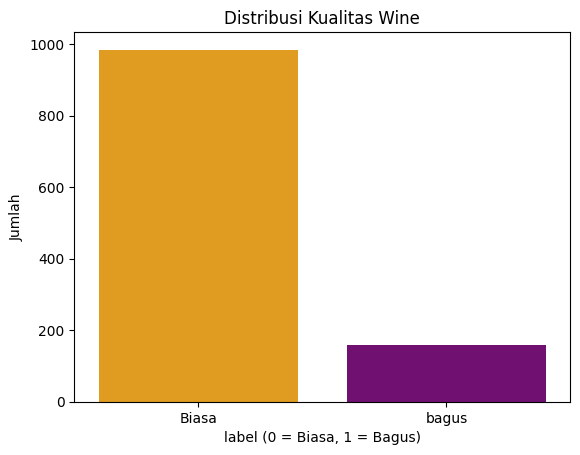

In [ ]:
# Visualisasi distribusi target 
sns.countplot(x=df['label'], palette=["orange", "purple"])
plt.title("Distribusi Kualitas Wine")
plt.xlabel("label (0 = Biasa, 1 = Bagus)")
plt.ylabel("Jumlah")
plt.xticks(ticks=[0, 1], labels=["Biasa", "bagus"])
plt.show()

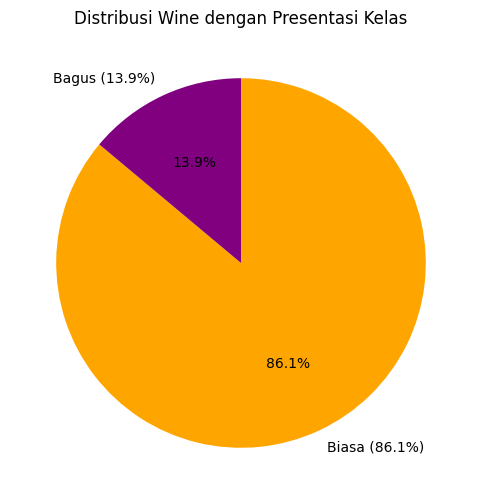

In [12]:
# Pie chart dengan presentasi kelasnya
labels = ["Biasa", "Bagus"]
colors = ["orange", "purple"]
counts = df['label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=[f"{label} ({count/sum(counts)*100:.1f}%)" for label, count in zip(labels, counts)], colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Distribusi Wine dengan Presentasi Kelas")
plt.show()

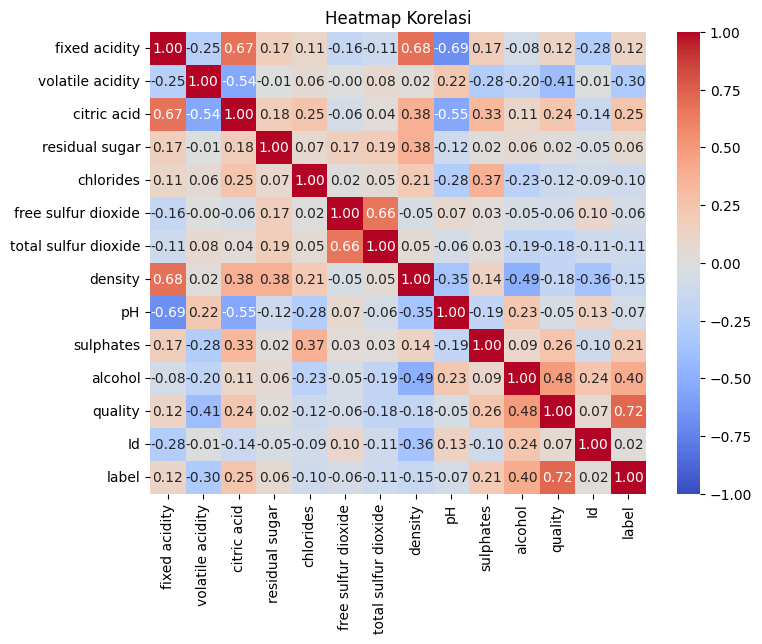

In [13]:
# Heatmap Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Heatmap Korelasi")
plt.show()

In [14]:
# training logistic regression
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500, random_state=42)

In [15]:
# Evaluasi pada X_test
Y_pred_test = model.predict(X_test)
Y_prob_test = model.predict_proba(X_test)[:, 1]
accuracy_test = accuracy_score(Y_test, Y_pred_test)
auc_test = roc_auc_score(Y_test, Y_prob_test)

# Evaluasi pada X_train
Y_pred_train = model.predict(X_train)
Y_prob_train = model.predict_proba(X_train)[:, 1]
accuracy_train = accuracy_score(Y_train, Y_pred_train)
auc_train = roc_auc_score(Y_train, Y_prob_train)

# Print hasil evaluasi
print(f"\nModel Evaluation:")
print(f" Train Accuracy: {accuracy_train:.4f}, Train AUC: {auc_train:.4f}")
print(f" Test Accuracy: {accuracy_test:.4f}, Test AUC: {auc_test:.4f}")


Model Evaluation:
 Train Accuracy: 0.8698, Train AUC: 0.8895
 Test Accuracy: 0.8996, Test AUC: 0.9012


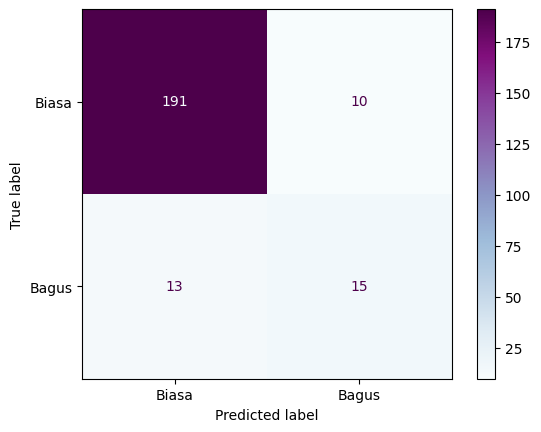

In [16]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Biasa", "Bagus"]).plot(cmap='BuPu')
plt.show()

In [17]:
from sklearn.metrics import classification_report
#menampilkan classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       201
           1       0.60      0.54      0.57        28

    accuracy                           0.90       229
   macro avg       0.77      0.74      0.75       229
weighted avg       0.90      0.90      0.90       229

